In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.optimize as opt
import csv

import matplotlib
matplotlib.rcParams['figure.dpi'] = 50

In [ ]:
#Set phase guess and pulse time for Pupillo gate
 # in Omega*t dimension-less units
resolution = 200 # number of phase steps in the pulse
# PhaseGuess = [(-0.5*np.sin(2*np.pi*x/pulse_time)-0.5) for x in np.linspace(0,pulse_time,resolution)] #input a phase profile guess 
Omega_Rabi1=2*np.pi*2 #MHz
Omega_Rabi2=2*np.pi*2 #MHz
pulse_time=6.7
Blockade = 20 #2*np.pi*100  #MHz
R_lifetime = 12000000 # microseconds
Delta1=0
Delta2=2 #MHz 

delta1=0
delta1=0
 
phi_offset1=-0.7318
phi_offset2=-2.44
phi_offset3=-5.15
phi_offset4=-.5


#Mark's Parms

Amp1=2*np.pi*0.1122
Amp2=0.1
Amp3=0.01
Amp4=0.01


f1=1.043*Omega_Rabi1
f2=1.043*Omega_Rabi1*2
f3=1.043*Omega_Rabi1*4
f4=1.043*Omega_Rabi1*8

inputs=[pulse_time,delta1,Amp1,f1,phi_offset1]



inputs=[pulse_time,delta1,Amp1,f1,phi_offset1,Amp2,phi_offset2,f2,Amp3,phi_offset3,f3,phi_offset4,f4,Amp4]


In [12]:
#ADD FINITE RYDBERG BLOCKADE STRENGTH
def pulse_gate_infidelity_opt_two_level(inputs):
    def loss_function(inputs):
        #Define inputs
        pulse_time_f=inputs[0]
#         pulse_time_f=pulse_time#inputs[0]
        Delta_f1=inputs[1]
        Omega_Rabi_f1=Omega_Rabi1
        Amp_f1=inputs[2]
        f1_f1=inputs[3]
        phi_offset_f1=inputs[4]
        Omega_Rabi_f2=Omega_Rabi2
        Amp_f2=inputs[5]
        f1_f2=inputs[7]
        phi_offset_f2=inputs[6]
        Amp_f3=inputs[8]
        phi_offset_f3=inputs[9]
        f1_f3=inputs[10]
        phi_offset_f4=inputs[11]
        f1_f4=inputs[12]
        Amp_f4=inputs[13]
        #define phase profile as a function of time based on inputs
        #phase profile with 2 Cosine terms
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2) for t in np.linspace(0,pulse_time_f,resolution)] #input a phase profile guess
        # phase profile with 1 cosine term for testing
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1) for t in np.linspace(0,pulse_time_f,resolution)] #input a phase profile guess
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)+Amp_f3*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3) for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**2 for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**2+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2) for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**2+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)**2 for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**3+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)**2 for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**3 for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)**2+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3) for t in np.linspace(0,pulse_time_f,resolution)]
        PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3) for t in np.linspace(0,pulse_time_f,resolution)]
        #PhaseGuess = [((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2)+Amp_f3*np.cos((t-pulse_time_f/2)*((f1_f3)/Omega_Rabi_f1)-phi_offset_f3)+Amp_f4*np.cos((t-pulse_time_f/2)*((f1_f4)/Omega_Rabi_f1)-phi_offset_f4) for t in np.linspace(0,pulse_time_f,resolution)]
        phases = PhaseGuess
        times=np.linspace(0,pulse_time_f,resolution+1) # Time in dimensionless units omega_rabi*t
        #Blockade = inputs[7] #Rydberg blockade strength in MHz

        
        DecayRate=(1/R_lifetime)/(Omega_Rabi1) # Decay rate normalized with Rabi frequency
        B = Blockade/Omega_Rabi1 # normalize the blockade with the Rabi frequency
        psi01 = np.array([1,0,0], complex)  # single atom state ground and Rydberg
        psi11 = np.array([1,0,0,0,0,0,0], complex) # two atom state ground-ground, ground-Rydberg, Rydberg-Rydberg
        for i in range(resolution):  #loop over small time increments and apply small unitary rotations at each step
            dt = times[i+1]-times[i]  #time increment difference
            Omega1 = 1*np.exp(1j*phases[i])  #set up the complex Rabi frequency for m=-1/2
            Omega2 = (Omega_Rabi2/Omega_Rabi1)*Omega1  #set up the complex Rabi frequency for m=+1/2
            H01 = 0.5*np.array([[0, Omega1, Omega2], [np.conj(Omega1), Delta1, 0], [np.conj(Omega2), 0, Delta2]]) #Hamiltonian for one atom
            if B is None:
                H11 = np.sqrt(2)*H01
            else:
                H11 = np.sqrt(2)*0.5*np.array([[0, Omega1, Omega2, 0,0,0,0], [np.conj(Omega1), Delta1, 0, Omega1, Omega2, 0, 0], [np.conj(Omega2), 0, Delta2, 0, Omega1, Omega1, Omega2], [0, np.conj(Omega1), 0, 2*Delta1+B, 0,0,0], [0, np.conj(Omega2), 0, 0, Delta1+Delta2+B, 0, 0], [0, 0, np.conj(Omega1), 0, 0, Delta1+Delta2+B, 0], [0, 0, np.conj(Omega2), 0, 0, 0, 2*Delta2+B]]) # Hamiltonian for two atoms
            psi01 = scipy.linalg.expm(-1j*H01*dt)@psi01  #evolve input 1 atom state in time
            psi11 = scipy.linalg.expm(-1j*H11*dt)@psi11  #evolve 2 atom state
        # extract phases and populations to calculate the fidelity
        phase = psi01[0]/np.abs(psi01[0]) # Calculate the phase shift induced on the ground state for 1 atom
        psi01/=phase  # divide 1 atom state by phase shift
        psi11/=phase**2 #divide 2 atom state by 1 atom phase shift on each atom
        psi01 /= np.linalg.norm(psi01)
        psi11 /= np.linalg.norm(psi11)
        # Bell state fidelity based on ground state populations for the 1 atom and 2 atom case.
        # The relative phase shifts between the two psi01[0] and psi11[0] are also accounted for in this calculation
        # For perfect fidelity, there will be a pi phase shift between the two t
        F_bell = 1/16*np.abs(1+2*psi01[0]-psi11[0])**2
        F_av = 16/20*F_bell + 1/20*(1+2*np.abs(psi01[0])**2+np.abs(psi11[0])**2)
        return (1-F_bell)
    def callback(inputs):
        infid = loss_function(inputs)
        print("Infidelity: {}".format(infid), end = '\r', flush=True)
    inF_bell = scipy.optimize.minimize(loss_function,
                                      inputs,
                                      callback=callback,
                                      options = {'gtol': 1e-6})
    return inF_bell.fun, inF_bell.x

In [13]:
infid, parms=pulse_gate_infidelity_opt_two_level(inputs)

In [14]:
parms

array([ 1.20779459e+01, -1.75008666e+00, -2.61721779e-01,  9.99192792e+00,
        4.72067658e+00, -2.50787015e+00, -1.57746329e+00,  2.18251787e+01,
        1.00000000e-02, -3.14954422e+00,  2.84522347e+01, -5.00000000e-01,
        1.04853796e+02,  1.00000000e-02])

In [15]:
pulse_time_f=parms[0]
Delta_f1=parms[1]
Omega_Rabi_f1=Omega_Rabi1
Amp_f1=parms[2]
f1_f1=parms[3]
phi_offset_f1=parms[4]
# Omega_Rabi_f2=Omega_Rabi2
Amp_f2=parms[5]
f1_f2=parms[7]
phi_offset_f2=parms[6]
# Amp_f3=parms[7]
# f1_f3=parms[8]
# phi_offset_f3=parms[9]

phases=[((Delta_f1/Omega_Rabi_f1)*t)+Amp_f1*np.cos((t-pulse_time_f/2)*((f1_f1)/Omega_Rabi_f1)-phi_offset_f1)+Amp_f2*np.cos((t-pulse_time_f/2)*((f1_f2)/Omega_Rabi_f1)-phi_offset_f2) for t in np.linspace(0,pulse_time_f,resolution)] #input a phase profile guess

Text(0.95, 0.95, 'Blockade Strength = 20 \n\n Infidelity: 0.00181')

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
fin

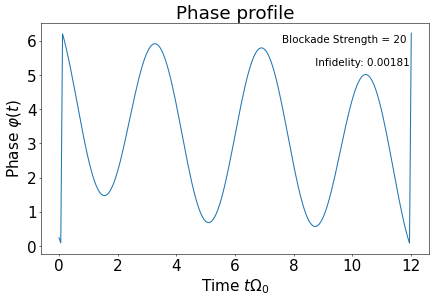

In [17]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

times_list = []
interpolation = []

for i in range(resolution):
    times_list.append(np.linspace(0,parms[0],resolution + 1)[i])

# fig, ax = plt.plot(figsize = (8,8))
plt.figure(figsize=(10,6))
plt.plot(times_list, (np.array(phases)-2.2)%(2*np.pi))
plt.title("Phase profile")
plt.ylabel("Phase $\\varphi(t)$")
plt.xlabel("Time $t\Omega_0$")
plt.text(.95, 0.95, "Blockade Strength = 20 \n\n Infidelity: {:.5f}".format(infid), transform=plt.gca().transAxes,
         fontsize=15, verticalalignment='top', horizontalalignment='right')


In [32]:
# --- load CRAB best profile from previous run ---
times_crab = times_list                   # whatever your CRAB grid was
phi_crab  = phases            # the array of length times_list

# --- interpolate onto the GRAPE grid ---
N=1000 # number of points in the GRAPE pulse
t_grape = np.linspace(0, pulse_time, N)
u = np.interp(t_grape, times_crab, phi_crab)


In [62]:
#GRAPE IMPLEMENTATION
from scipy.linalg import expm
from scipy.optimize import minimize

# --- Parameters ---
T_total = pulse_time
dt = T_total / N
#u = np.zeros(N)     # initial control guess (e.g., flat)

#parameters from above
Omega1 = 1*np.exp(1j*phases[i])  #set up the complex Rabi frequency for m=-1/2
Omega2 = (Omega_Rabi2/Omega_Rabi1)*Omega1  #set up the complex Rabi frequency for m=+1/2
B = Blockade/Omega_Rabi1 # normalize the blockade with the Rabi frequency

#Model for GRAPE
psi_initial=np.array([1,0,0,0,0,0,0], complex)
psi_target = np.zeros(7, complex)
psi_target[1] = 1.0    # index 1 is |gr1> change if necessary.
HFull=np.sqrt(2)*0.5*np.array([[0, Omega1, Omega2, 0,0,0,0], [np.conj(Omega1), Delta1, 0, Omega1, Omega2, 0, 0], [np.conj(Omega2), 0, Delta2, 0, Omega1, Omega1, Omega2], [0, np.conj(Omega1), 0, 2*Delta1+B, 0,0,0], [0, np.conj(Omega2), 0, 0, Delta1+Delta2+B, 0, 0], [0, 0, np.conj(Omega1), 0, 0, Delta1+Delta2+B, 0], [0, 0, np.conj(Omega2), 0, 0, 0, 2*Delta2+B]]) # Hamiltonian for two atoms
H0 = np.diag(np.diag(HFull)) # Hamiltonian without control
H1=HFull-H0 # Hamiltonian with control (e.g., Rabi frequency)
H0 = 0.5*(H0 + H0.conj().T)
H1 = 0.5*(H1 + H1.conj().T)
dim = psi_initial.shape[0]

# 1A) Reconstruct the φ=0 and φ=π/2 versions of the full drive Hamiltonian
Omega2_ratio = Omega_Rabi2/Omega_Rabi1

# HFull at φ=0  (Ω₁=1, Ω₂=Ω2_ratio)
HFull_0 = np.sqrt(2)*0.5 * np.array([
    [0,           1,             Omega2_ratio,   0, 0, 0, 0],
    [1,           Delta1,        0,              1, Omega2_ratio, 0, 0],
    [Omega2_ratio,0,              Delta2,         0, 1, 1, Omega2_ratio],
    [0,           1,             0,      2*Delta1+B, 0, 0, 0],
    [0, Omega2_ratio, 0,      0,  Delta1+Delta2+B,  0, 0],
    [0,           0, 1,             0,      0,  Delta1+Delta2+B, 0],
    [0,           0, Omega2_ratio, 0,      0, 0, 2*Delta2+B]
])

# HFull at φ=π/2 (Ω₁=i, Ω₂=i·Omega2_ratio)
HFull_pi2 = np.sqrt(2)*0.5 * np.array([
    [0,            1j,            1j*Omega2_ratio, 0,     0, 0, 0],
    [-1j,          Delta1,        0,               1j,    1j*Omega2_ratio, 0, 0],
    [-1j*Omega2_ratio, 0,         Delta2,          0,     1j, 1j, 1j*Omega2_ratio],
    [0,           -1j,            0,      2*Delta1+B,   0, 0, 0],
    [0, -1j*Omega2_ratio, 0,      0,  Delta1+Delta2+B,  0, 0],
    [0,           0,            -1j,     0,     0,  Delta1+Delta2+B, 0],
    [0,           0, -1j*Omega2_ratio, 0, 0, 0, 2*Delta2+B]
])

# 1B) Extract H0 and the two quadrature controls H1x, H1y
H0   = np.diag(np.diag(HFull_0))
H1x  = 0.5*(HFull_0 - H0 + (HFull_0 - H0).conj().T)     # φ=0 generator
H1y  = 0.5*(HFull_pi2 - H0 + (HFull_pi2 - H0).conj().T) # φ=π/2 generator

# 1C) Normalized blockade
B = Blockade/Omega_Rabi1


# sanity check
assert np.allclose(np.vdot(psi_initial, psi_initial), 1.0)
assert np.allclose(np.vdot(psi_target,   psi_target),   1.0)

def H_control(u_j):
    """Total Hamiltonian at control amplitude u_j."""
    H = H0 + u_j * H1
    # explicitly symmetrize - without this step, the result is not unitary (due to numerical errors in the exponentiation)
    return 0.5*(H + H.conj().T)

'''
def H_control_phase(phi_j):
    # Hermitian for any real phi_j:
    return H0 + np.cos(phi_j) * H1x + np.sin(phi_j) * H1y
'''
def H_control_phase(phi_j):
    return H0 + np.exp(1j*phi_j) * H1

def forward_propagation(u):
    psi = np.zeros((N+1, dim), complex)
    psi[0] = psi_initial
    for j in range(N):
        Uj = expm(-1j * H_control(u[j]) * dt)
        psi[j+1] = Uj @ psi[j]
    return psi

def backward_propagation(u):
    chi = np.zeros((N+1, dim), complex)
    chi[N] = psi_target
    for j in reversed(range(N)):
        Uj = expm(-1j * H_control(u[j]) * dt)
        chi[j] = Uj.conj().T @ chi[j+1]
    return chi

def forward_phase(phi):
    psi = np.zeros((N+1, dim), complex)
    psi[0] = psi_initial
    for j in range(N):
        Uj = expm(-1j * H_control_phase(phi[j]) * dt)
        psi[j+1] = Uj @ psi[j]
    return psi

def backward_phase(phi):
    chi = np.zeros((N+1, dim), complex)
    chi[N] = psi_target
    for j in reversed(range(N)):
        Uj = expm(-1j * H_control_phase(phi[j]) * dt)
        chi[j] = Uj.conj().T @ chi[j+1]
    return chi


def fidelity_and_gradient(u):
    psi = forward_propagation(u)
    chi = backward_propagation(u)
    grad = np.zeros_like(u)
    for j in range(N):
        # derivative of H_control wrt u_j is H1
        grad[j] = 2 * np.imag(chi[j].conj().T @ (H1 @ psi[j])) * dt
    F = np.abs(np.vdot(psi_target, psi[-1]))**2
    return 1 - F, -grad  # infidelity and gradient for optimizer

def fidelity_and_gradient_phase(phi):
    psi = forward_phase(phi)
    chi = backward_phase(phi)

    grad = np.zeros_like(phi)
    for j in range(N):
        # derivative of H wrt phi_j is i*e^{i phi_j} H1
        # the GRAPE formula gives:
        grad[j] = 2 * np.real(
            chi[j].conj().T @ ( (1j*np.exp(1j*phi[j]) * H1) @ psi[j] )
        ) * dt

    F = np.abs( np.vdot(psi_target, psi[-1]) )**2
    return 1 - F, grad


# sanity check
u_test = 0.1
U = expm(-1j*(H0 + u_test*H1)*dt)
# should be unitary: U†U = I
err = np.linalg.norm(U.conj().T @ U - np.eye(7))
print("unitarity error of one slice:", err)
assert err < 1e-8

# Use L-BFGS-B to optimize
history = []
def callback(xk):
    f, _ = fidelity_and_gradient(xk)
    history.append(1 - f)   # store fidelity

result = minimize(lambda x: fidelity_and_gradient(x)[0],
                  u,
                  jac=lambda x: fidelity_and_gradient(x)[1],
                  method='L-BFGS-B',
                  options={'maxiter': 200, 'disp': True},
                  callback=callback)

u_opt = result.x
infid_opt = result.fun
print(f'Optimized infidelity: {infid_opt:.6e}')



unitarity error of one slice: 1.9229764234966596e-16
Optimized infidelity: 3.021130e-05


In [63]:
# ——————————————————————————————————————
# 1) Your “best” CRAB parameters:
# ——————————————————————————————————————
# (the same array you passed into pulse_gate_infidelity_opt_two_level)
crab_params = parms

# Unpack for clarity
pulse_time_f, Delta_f1, Amp_f1, f1_f1, phi_offset_f1, Amp_f2, phi_offset_f2, f1_f2, Amp_f3, phi_offset_f3, f1_f3 = (
    crab_params[0], crab_params[1], crab_params[2], crab_params[3], crab_params[4],
    crab_params[5], crab_params[6], crab_params[7], crab_params[8], crab_params[9], crab_params[10]
)
t_crab = np.linspace(0, pulse_time_f, resolution)
phi_crab = [
    (Delta_f1/Omega_Rabi1)*t
  + Amp_f1*np.cos((t-pulse_time_f/2)*(f1_f1/Omega_Rabi1)-phi_offset_f1)
            * np.cos((t-pulse_time_f/2)*(f1_f3/Omega_Rabi1)-phi_offset_f3)
  + Amp_f2*np.cos((t-pulse_time_f/2)*(f1_f2/Omega_Rabi1)-phi_offset_f2)
            * np.cos((t-pulse_time_f/2)*(f1_f3/Omega_Rabi1)-phi_offset_f3)
  for t in t_crab
]

# 4) Interpolate that onto your GRAPE grid of length N:
t_grape = np.linspace(0, pulse_time_f, N+1)
# we need N values (one per slice), so drop the last point
phi0 = np.interp(t_grape[:-1], t_crab, phi_crab)

# 5) Now use phi0 as your initial guess in the phase‐only GRAPE:
result = minimize(
    lambda ph: fidelity_and_gradient_phase(ph)[0],
    phi0,
    jac    = lambda ph: fidelity_and_gradient_phase(ph)[1],
    method = 'L-BFGS-B',
    options= {'maxiter':1000, 'disp':True}
)

phi_opt   = result.x
infid_opt = result.fun
print(f"Optimized phase‐GRAPE infidelity = {infid_opt:.6e}")

Optimized phase‐GRAPE infidelity = -2.634638e+05


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

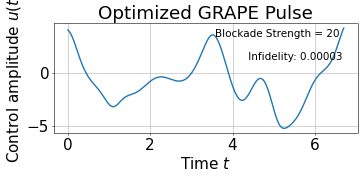

In [34]:
# --- Plot the optimized control pulse ---
t = np.linspace(0, T_total, N)

plt.figure(figsize=(8,4))
plt.plot(t, u_opt, lw=2)
plt.xlabel('Time $t$')
plt.ylabel('Control amplitude $u(t)$')
plt.title('Optimized GRAPE Pulse')
plt.grid(True)
plt.tight_layout()
plt.text(.95, 0.95, "Blockade Strength = 20 \n\n Infidelity: {:.5f}".format(infid_opt), transform=plt.gca().transAxes,
         fontsize=15, verticalalignment='top', horizontalalignment='right')
plt.show()


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

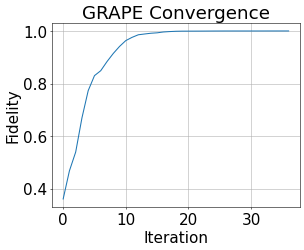

In [35]:
#GRAPE FIDELITY CONVERGENCE PLOT
plt.figure()
plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Fidelity')
plt.title('GRAPE Convergence')
plt.grid(True)
plt.show()


In [ ]:
def compute_infidelity_from_phases(phases, times,
                                   Delta1, Delta2,
                                   Omega_Rabi1, Omega_Rabi2,
                                   Blockade, R_lifetime):
    """
    phases : array of length R (phase values φ_i at each slice)
    times  : array of length R+1 (time grid from 0 to pulse_time)
    returns: 1 - F_bell
    """
    # normalize parameters
    B = Blockade/Omega_Rabi1
    # initial states
    psi01 = np.array([1,0,0], complex)
    psi11 = np.array([1,0,0,0,0,0,0], complex)

    for i in range(len(phases)):
        dt    = times[i+1] - times[i]
        Omega1 = np.exp(1j*phases[i])
        Omega2 = (Omega_Rabi2/Omega_Rabi1)*Omega1

        # one‐atom Hamiltonian H01
        H01 = 0.5 * np.array([
            [0,           Omega1,       Omega2],
            [np.conj(Omega1), Delta1,   0     ],
            [np.conj(Omega2), 0,        Delta2]
        ])

        # two‐atom Hamiltonian H11
        if B is None:
            H11 = np.sqrt(2)*H01
        else:
            H11 = 0.5*np.sqrt(2)*np.array([
                [0,            Omega1,        Omega2,       0,             0,             0,             0],
                [np.conj(Omega1), Delta1,     0,             Omega1,        Omega2,        0,             0],
                [np.conj(Omega2), 0,          Delta2,        0,             Omega1,        Omega1,        Omega2],
                [0,             np.conj(Omega1), 0,          2*Delta1 + B,  0,             0,             0],
                [0,             np.conj(Omega2), 0,          0,             Delta1+Delta2+B, 0,          0],
                [0,             0,          np.conj(Omega1), 0,             0,           Delta1+Delta2+B, 0],
                [0,             0,          np.conj(Omega2), 0,             0,           0,           2*Delta2 + B]
            ])

        # propagate
        psi01 = scipy.linalg.expm(-1j * H01 * dt) @ psi01
        psi11 = scipy.linalg.expm(-1j * H11 * dt) @ psi11

    # remove global phase
    phase = psi01[0]/np.abs(psi01[0])
    psi01 /= phase
    psi11 /= phase**2

    # normalize
    psi01 /= np.linalg.norm(psi01)
    psi11 /= np.linalg.norm(psi11)

    # Bell fidelity
    F_bell = (1/16) * np.abs(1 + 2*psi01[0] - psi11[0])**2
    return 1 - F_bell

In [39]:
# --- Compute the infidelity of the GRAPE pulse ---
R = len(u_opt)                  # number of slices
times_grape = np.linspace(0, pulse_time, R+1)

infidelity_grape = compute_infidelity_from_phases(
    phases       = u_opt,
    times        = times_grape,
    Delta1       = Delta1,
    Delta2       = Delta2,
    Omega_Rabi1  = Omega_Rabi1,
    Omega_Rabi2  = Omega_Rabi2,
    Blockade     = Blockade,
    R_lifetime   = R_lifetime
)

print(f"CRAB‐style infidelity of GRAPE pulse: {infidelity_grape:.6}")

CRAB‐style infidelity of GRAPE pulse: 0.786086
